# Forecasting
Forecastin is by far the most important and frequently used application of predictive analytics because it has significant impact on both Top line and the botton line of an organization.

# Components of Time-Series Data
The time series data Yt is a random variable, usually collected at regular interval and in chronological order. If the time-series data contains observation of just a single variable (such as demand of a product at time t), then it is termed as Univariant time-series data. If the data consists of more than one variable, for example, demand for a product at time t, price at time t, amount of money spent by the company on promotion at time t, competitors price at time t, etc., then it is called multivariant time-series data.

# Time-Series data can be broken into four following components
1. Trend Component (Tt): Trend is consistent long-term upward or downward movement of data
2. Seasonal Component (St): Seasonal component (measured using seasonality index) is the repetitive upward or downward movement (or fluctuations) from the trend that occurs within a calendar year at a fixed intervals (i.e., time between seasons is fixed) such as seasons, quarters, months, days of the week, etc. The upward or downward fluctionation may be casued due to festivals, customs within a society, school holidays, busines practices within the market such as "end of season sale", and so on.
3. Cyclical Component (Ct): Cyclical component is fluctuation around the trend line at random interval (i.e., the time line between cycles in random) that happens due to macro-economic changes such as recession, unemployment, etc., Cyclical luctuations have repetitive patterns with time between repetitions of more than a year. Whereas in the case of sesonlaity, the fluctuations are observed within a calendar year and are driven by factors such as festivals and customs that exist in a society. A major difference between seasonal fluctation and cyclical fluctuation is that seasonal fluctuation occurs at fixed preido withn a calendar year,, whereas cyclical fluctuations hvae random time between fluctuations. That is the periodicity of seasonal fluctuations is constant, whereas the periodicity of cyclical fluctuations is not constant.
4. Irregulat Component (It): Irregular component is the white noise or random uncorrelated changes that follow a normal distribution with mean value of 0 and constant variance.

# Moving Average

In [5]:
import pandas as pd
import numpy as np

In [7]:
wsb_df = pd.read_csv("wsb.csv")

In [9]:
wsb_df.head(10)

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1
5,6,4377766,156,0
6,7,2798343,98,1
7,8,4303668,144,0
8,9,2958185,112,1
9,10,3623386,120,0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

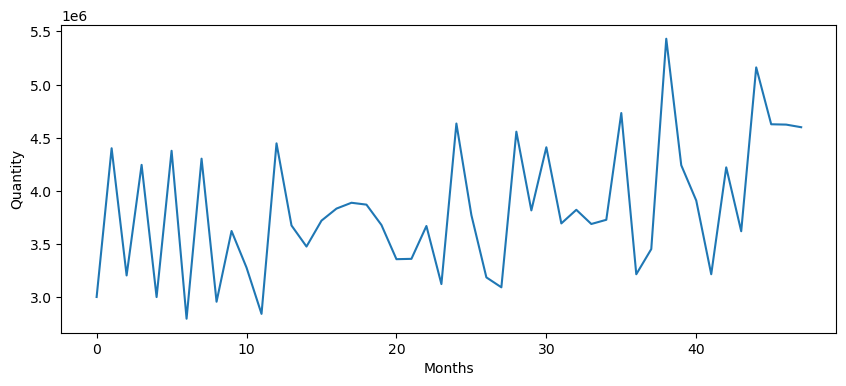

In [15]:
plt.figure(figsize=(10,4))
plt.xlabel("Months")
plt.ylabel("Quantity")
plt.plot(wsb_df['Sale Quantity'])

In [16]:
wsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


# Forecasting using Moving Average
Moving average is one of the simplest forecasting techinques which forecasts the future value of a time-series data using average (or weighted average) of the past N observations. 
Pandas has a function rolling() which can be used with an aggregate function like mean() for calculating moving avarage for a time window. For example, to calculate 12 months moving average using last 12 month's data starting from last month (previous period), rolling() will take a paramter window, which is set to 12 to indicate moving average of 12 months data, and then use Pandas shift() funciton, which takes parameter 1 to specifiy that the 12 months data should start from last month. Shift(1) means calculating moving average for the specified window period starting from previous observation (in this case last month)

Sure! Let's go through a simple example of forecasting using a moving average.

### What is a Moving Average?
A moving average is a statistical method used to smooth out short-term fluctuations and highlight longer-term trends or cycles. It's commonly used in time series data to predict future values based on past data.

### Simple Moving Average (SMA)
A Simple Moving Average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.

### Example
Let's say we have the sales data for a product over the last 5 months:

| Month | Sales |
|-------|-------|
| Jan   | 100   |
| Feb   | 120   |
| Mar   | 130   |
| Apr   | 150   |
| May   | 170   |

To forecast the sales for June using a 3-month moving average, we would:

1. **Select the number of periods (n)**: Here, n = 3.
2. **Calculate the average of the last 3 months**:
   - For March, April, and May: 
     \[
     \text{SMA} = \frac{130 + 150 + 170}{3} = 150
     \]

So, the forecasted sales for June would be 150 units.

### Steps to Calculate SMA
1. **Choose the number of periods (n)**: This is the number of data points you want to average.
2. **Sum the sales for the last n periods**.
3. **Divide the sum by n** to get the average.

### Advantages and Disadvantages
- **Advantages**:
  - Simple to calculate and understand.
  - Smooths out data to identify trends.

- **Disadvantages**:
  - Lags behind the actual data.
  - Does not account for seasonal variations or trends.

This method is useful for short-term forecasting and can be applied to various fields such as finance, economics, and inventory management⁴⁵.

Would you like to know more about other forecasting methods or how to implement this in Python?

Source: Conversation with Copilot, 6/11/2024
(1) Simple Moving Average Forecasting: Definition and Example. https://www.indeed.com/career-advice/career-development/simple-moving-average-forecasting.
(2) Moving Average (MA): Purpose, Uses, Formula, and Examples - Investopedia. https://www.investopedia.com/terms/m/movingaverage.asp.
(3) Forecasting: Moving Averages, MAD, MSE, MAPE. https://www.youtube.com/watch?v=Wo5YWXDRXv8.
(4) Forecasting - Simple moving average - Example 1. https://www.youtube.com/watch?v=WlHgUtrGalI.
(5) Forecasting 5: Simple moving average with examples and its limitations. https://www.youtube.com/watch?v=4islv0TDKYI.
(6) Forecasting Method: Moving Average - TransImpact. https://transimpact.com/nextsights/forecasting-method-moving-average/.

Sure! Let's walk through an example of forecasting using a Simple Moving Average (SMA) with Python and pandas.

### Example Data
We'll use the same sales data for a product over the last 5 months:

```python
import pandas as pd

# Create a DataFrame with sales data
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May'],
    'Sales': [100, 120, 130, 150, 170]
}
df = pd.DataFrame(data)
```

### Calculate the Simple Moving Average (SMA)
To calculate the 3-month moving average, we can use the `rolling` method in pandas:

```python
# Calculate the 3-month moving average
df['SMA_3'] = df['Sales'].rolling(window=3).mean()

print(df)
```

### Output
The output will look like this:

```
  Month  Sales  SMA_3
0   Jan    100    NaN
1   Feb    120    NaN
2   Mar    130  116.67
3   Apr    150  133.33
4   May    170  150.00
```

### Explanation
- **Window Size**: The `window=3` parameter specifies the number of periods to include in the moving average calculation.
- **NaN Values**: The first two rows have `NaN` values because there aren't enough previous data points to calculate the 3-month average.

### Forecasting
To forecast the sales for June, we can use the last calculated SMA value:

```python
# Forecast for June
forecast_june = df['SMA_3'].iloc[-1]
print(f"Forecasted sales for June: {forecast_june}")
```

This will output:
```
Forecasted sales for June: 150.0
```

### Summary
- **Simple Moving Average (SMA)**: Smooths out short-term fluctuations and highlights longer-term trends.
- **pandas `rolling` Method**: Used to calculate the moving average over a specified window.

This method is straightforward and useful for short-term forecasting. If you have any more questions or need further assistance, feel free to ask!

Source: Conversation with Copilot, 6/11/2024
(1) Pandas & Numpy Moving Average & Exponential Moving Average ... - DataCamp. https://www.datacamp.com/tutorial/moving-averages-in-pandas.
(2) Moving Average Smoothing for Data Preparation and Time Series .... https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/.
(3) Time Series Forecasting Using Python - Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/06/time-series-forecasting-using-python/.
(4) Explore Data Trends Using Moving Averages - Analytics Vidhya. https://www.analyticsvidhya.com/blog/2024/07/moving-averages-in-python/.
(5) How to Calculate an Exponential Moving Average in Pandas - Statology. https://www.statology.org/exponential-moving-average-pandas/.
(6) pandas.DataFrame.ewm — pandas 2.2.3 documentation. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html.
(7) How to Smooth Data in Python - Delft Stack. https://www.delftstack.com/howto/python/smooth-data-in-python/.
(8) How can i smooth data in Python? in Python | CodeMax. https://codemax.app/snippet/how-can-i-smooth-data-in-python-in-python/.
(9) How to Perform Moving Average Smoothing on Time Series Data in Python. https://www.statology.org/how-to-perform-moving-average-smoothing-on-time-series-data-in-python/.

In [19]:
wsb_df

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1
5,6,4377766,156,0
6,7,2798343,98,1
7,8,4303668,144,0
8,9,2958185,112,1
9,10,3623386,120,0


In [20]:
wsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


In [27]:
wsb_df["mavg_12"] = wsb_df['Sale Quantity'].rolling(window=12).mean().shift(1)

In [28]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [29]:
wsb_df[['Sale Quantity', 'mavg_12']][36:]

,Sale Quantity,mavg_12
36,3216483,3928410.33
37,3453239,3810280.00
38,5431651,3783643.33
39,4241851,3970688.42
40,3909887,4066369.08
41,3216438,4012412.75
42,4222005,3962369.58
43,3621034,3946629.42
44,5162201,3940489.50
45,4627177,4052117.17


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


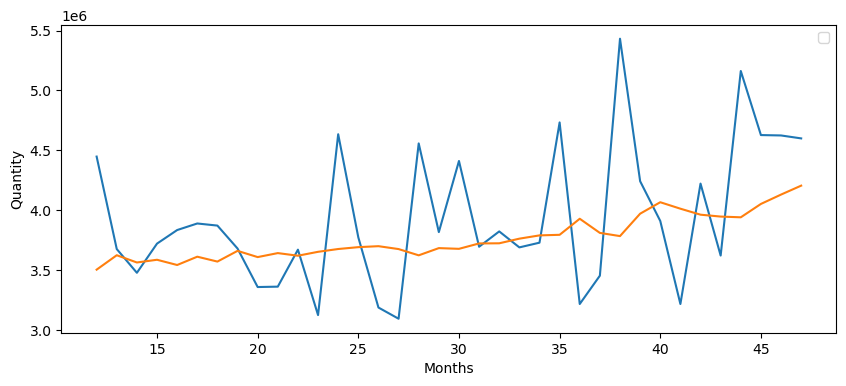

In [31]:
# Lets try to plot this data using the following python code
plt.figure(figsize = (10,4))
plt.xlabel("Months")
plt.ylabel("Quantity")
plt.plot(wsb_df["Sale Quantity"][12:])
plt.plot(wsb_df['mavg_12'][12:])
plt.legend()

In [ ]:
# Calculating Forecast Accuracy
### Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) are the tow most popular accuracy meansures of forecasting. 